In [1]:
%matplotlib widget

In [2]:
%load_ext autoreload

In [3]:
import numpy as np
import panel as pn
from IPython.display import display

In [4]:
pn.extension('tabulator')

In [5]:
from libertem.api import Context

from microscope_calibration.common.model import Parameters4DSTEM, DescanError, PixelYX
from microscope_calibration.ui import CoordinateCorrectionLayout
from microscope_calibration.util.diffraction import get_twothetas

In [6]:
acceleration_voltage_V = 300000

In [7]:
structure_filename = 'BiFeO3EntryWithCollCode29921.cif'

In [8]:
twothetas = get_twothetas(structure_filename, acceleration_voltage_V, reciprocal_radius=3)
twothetas

array([0.     , 0.00242, 0.00419, 0.00484, 0.00541, 0.00684, 0.00802,
       0.00838, 0.00967, 0.01054, 0.01081, 0.01185, 0.01256, 0.01368,
       0.0143 , 0.01451, 0.01529, 0.01586, 0.01604, 0.01675, 0.01727,
       0.01744, 0.01809, 0.01857, 0.01934, 0.01979, 0.01994, 0.02052,
       0.02094, 0.02108, 0.02163, 0.02203, 0.02216, 0.02268, 0.02307,
       0.02369, 0.02406, 0.02418, 0.02466, 0.02501, 0.02513, 0.02593,
       0.02604, 0.02649, 0.02682, 0.02736, 0.02768, 0.02778, 0.0282 ,
       0.02851, 0.02861, 0.02902, 0.02932, 0.02942])

In [9]:
#calib_filename = '/storage/er-c-data/adhoc/libertem/libertem-test-data/default.blo'
calib_filename = 'with_descan.npy'

In [10]:
#ctx = Context.make_with(cpus=8)
ctx = Context.make_with('inline')

In [11]:
ds = ctx.load('auto', calib_filename)

In [12]:
start_params = None

Column
    [0] Markdown(str, max_width=500)
    [1] Row
        [0] FloatInput(name='Scan rotation / degrees')
        [1] FloatInput(name='Detector pixel p..., value=50.0)
        [2] FloatInput(name='Camera length / m', step=0.01, value=1.0)
        [3] FloatInput(name='Convergence s..., step=0.01, value=1.0)
    [2] Row
        [0] Column(margin=(3, 3), max_width=350, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['927c7c44-7344-4cb5-b29a-...], visible=False, width=2)
            [1] Bokeh(figure)
        [1] Column(margin=(3, 3), max_width=350, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['fdd10290-e993-42d2-9b84-...], visible=False, width=2)
            [1] Bokeh(figure)
    [3] Column
        [0] Markdown(str)
        [1] Tabulator(buttons={'select': '<i class="fa f...}, selectable=False, value=Empty DataFrame
Columns: [...)
        [2] Row
            [0] Button(name='Record')
            [1] Button(name='Apply correction f...)
            [2] Button(name='Clear')
            [3] Button(name='Refine correction w...)
    [4] Markdown(str, max_width=500)
    [5] Row
        [0] Column(margin=(3, 3), max_width=350, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['2f63ed59-4558-41de-a9eb-...], visible=False, width=2)
            [1] Bokeh(figure)
        [1] Column(margin=(3, 3), max_width=350, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['49302fb8-07bf-47ba-8a3c-...], visible=False, width=2)
            [1] Bokeh(figure)
        [2] Column(margin=(3, 3), max_width=350, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, margin=(5, 5, 5, 5), name='Image Controls', sizing_mode='fixed', tags=['1c897836-5892-4ead-ab8b-...], visible=False, width=2)
            [1] Bokeh(figure)
    [6] Row
        [0] FloatInput(name='Scale bar / nm', step=0.01, value=np.float64(22400.0))
    [7] Row
        [0] Column(margin=(3, 3), max_width=350, sizing_mode='stretch_width')
            [0] Row(height=40, margin=(0, 0))
                [0] FloatPanel(config={'headerControls': {'maxim...}, contained=False, name='Image Controls', objects=[Row
    [0] Select(name='...], position='center', status='closed')
                [1] Row(height=40, margin=(0, 0))
                [2] Toggle(height=2, ma
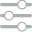
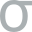
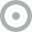
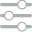
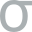
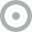
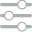
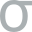
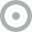
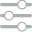
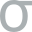
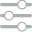
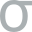
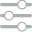
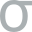
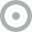
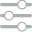
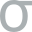
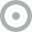
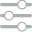
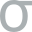
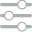
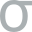

In [25]:
%autoreload
gui = CoordinateCorrectionLayout(
    dataset=ds,
    nav_mode='point',
    ctx=ctx,
    start_params=start_params,
#    twothetas=twothetas,
    # twothetas=np.array([0.,1.]),
    # twothetas=None,
)
display(gui.layout.servable())

In [14]:
start_params = gui.params

In [15]:
gui.params

Parameters4DSTEM(overfocus=0.0, scan_pixel_pitch=1e-06, scan_center=PixelYX(y=16.0, x=16.0), scan_rotation=0.0, camera_length=1.0, detector_pixel_pitch=5e-05, detector_center=PixelYX(y=32.0, x=32.0), semiconv=0.001, flip_factor=1.0, descan_error=DescanError(pxo_pxi=0.0, pxo_pyi=0.0, pyo_pxi=0.0, pyo_pyi=0.0, sxo_pxi=0.0, sxo_pyi=0.0, syo_pxi=0.0, syo_pyi=0.0, offpxi=0.0, offpyi=0.0, offsxi=0.0, offsyi=0.0), detector_rotation=0.0)

In [16]:
gui.descan_fixpoint_table.value.reset_index().to_numpy().astype(np.float32)

array([], shape=(0, 4), dtype=float32)

In [17]:
from typing import NamedTuple

import jax.numpy as jnp
import optimistix

from microscope_calibration.common.model import trace

In [18]:
class _CoordPointArgs(NamedTuple):
    params: Parameters4DSTEM
    # [(scan_y, scan_x, detector_y, detector_x) * n]
    points: jnp.array

In [19]:
def _coords_point_loss(y, args: _CoordPointArgs):
    detector_rotation, overfocus, flip_factor = y[:3]
    tilts = y[3:]

    assert len(tilts) == 2 * len(points)
    
    opt_params = args.params.derive(
        detector_rotation=detector_rotation,
        overfocus=overfocus,
        flip_factor=flip_factor,
    )

    detector_distances = []
    specimen_hits = []
    for i, (scan_y, scan_x, det_y, det_x) in enumerate(args.points):
        dy, dx = tilts[2*i:2*i + 2]
        res = trace(
            opt_params, scan_pos=PixelYX(y=scan_y, x=scan_x), source_dx=dx, source_dy=dy)
        detector_distances.extend((
            det_y - res['detector'].sampling['detector_px'].y,
            det_x - res['detector'].sampling['detector_px'].x,
        ))
        specimen_hits.append((
            res['specimen'].sampling['scan_px'].y,
            res['specimen'].sampling['scan_px'].x
        ))
    specimen_arr = jnp.array(specimen_hits)
    specimen_var = jnp.var(specimen_arr, axis=0)
    aspect = jnp.array((jnp.abs(jnp.abs(flip_factor) - 1) * 100, ))
    return jnp.concatenate((jnp.array(detector_distances), specimen_var, aspect))

In [20]:
points = gui.coord_fixpoint_table.value.reset_index().to_numpy()

In [21]:
points

array([], shape=(0, 6), dtype=object)

In [22]:
params = gui.params

In [23]:
def solve_coords_points(ref_params: Parameters4DSTEM, points: jnp.ndarray):
    args = _CoordPointArgs(
        params=ref_params,
        points=points,
    )

    start = jnp.array([ref_params.detector_rotation, ref_params.overfocus, ref_params.flip_factor] + [0., 0.] * len(points))
    opt_res = optimistix.least_squares(
        fn=_coords_point_loss,
        args=args,
        # FIXME Doesn't reach 1e-12 like the others, for unknown reasons
        solver=optimistix.BFGS(atol=1e-11, rtol=1e-11),
        y0=start,
        # FIXME needs more steps than others, for unknown reasons
        max_steps=10000,
    )
    residual = _coords_point_loss(opt_res.value, args)
    # Write the new tilts and offsets into the previous descan error
    detector_rotation, overfocus, flip_factor = opt_res.value[:3]
    res_params = ref_params.derive(
        detector_rotation=detector_rotation,
        overfocus=overfocus,
        flip_factor=flip_factor,
    ).normalize_types()

    return res_params, residual

In [24]:
new_param, residuals = solve_coords_points(params, points)

TypeError: Error interpreting argument to <function least_squares at 0x7f3fbe6c3f60> as an abstract array. The problematic value is of type <class 'numpy.ndarray'> and was passed to the function at path dynamic_nodonate['rest'][33].
This typically means that a jit-wrapped function was called with a non-array argument, and this argument was not marked as static using the static_argnums or static_argnames parameters of jax.jit.

In [ ]:
gui.update_with_force(gui.model_params, gui.params_update(new_param))